In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# ML packages
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, ConfusionMatrixDisplay

In [2]:
# Load dataset
df = pd.read_csv("Bank Data.csv")

In [3]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,...,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923


In [4]:
df.info()
#df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        50000 non-null  object 
 1   Customer_ID               50000 non-null  object 
 2   Month                     50000 non-null  object 
 3   Name                      44985 non-null  object 
 4   Age                       50000 non-null  object 
 5   SSN                       50000 non-null  object 
 6   Occupation                50000 non-null  object 
 7   Annual_Income             50000 non-null  object 
 8   Monthly_Inhand_Salary     42502 non-null  float64
 9   Num_Bank_Accounts         50000 non-null  int64  
 10  Num_Credit_Card           50000 non-null  int64  
 11  Interest_Rate             50000 non-null  int64  
 12  Num_of_Loan               50000 non-null  object 
 13  Type_of_Loan              44296 non-null  object 
 14  Delay_

In [5]:
df.isnull().sum()

ID                             0
Customer_ID                    0
Month                          0
Name                        5015
Age                            0
SSN                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary       7498
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                5704
Delay_from_due_date            0
Num_of_Delayed_Payment      3498
Changed_Credit_Limit           0
Num_Credit_Inquiries        1035
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age          4470
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly     2271
Payment_Behaviour              0
Monthly_Balance              562
dtype: int64

# Convert Numeric Columns
Some numeric columns may be read as text (object) due to data issues.


In [6]:
# 🔹 Convert numeric columns (which are object type) to float
cols_to_convert = [
    'Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
    'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
    'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries',
    'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Total_EMI_per_month',
    'Amount_invested_monthly', 'Monthly_Balance'
]


for col in cols_to_convert:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')


In [7]:
# 🔹 Drop rows with any NaN values
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

# Encode Target Variable

In [8]:
# 🔹 Convert target column 'Credit_Mix' to numeric (encoding)
df['Credit_Mix'] = df['Credit_Mix'].map({
    'Standard': 0,
    'Good': 1,
    'Bad': 2
})

# Drop rows where target couldn't be mapped
df.dropna(subset=['Credit_Mix'], inplace=True)

# Identify Categorical Columns

In [9]:
# 🔹 Select categorical columns (except target)
categorical_cols = df.select_dtypes(include='object').columns.tolist()
if 'Credit_Mix' in categorical_cols:
    categorical_cols.remove('Credit_Mix')

In [10]:
high_cardinality_cols = []
low_cardinality_cols = []

for col in categorical_cols:
    if df[col].nunique() > 10:  # threshold can be adjusted
        high_cardinality_cols.append(col)
    else:
        low_cardinality_cols.append(col)


In [11]:
# Label encode high cardinality columns

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in high_cardinality_cols:
    df[col] = le.fit_transform(df[col].astype(str))


In [12]:
# One-hot encode low cardinality columns
df = pd.get_dummies(df, columns=low_cardinality_cols, drop_first=True)


# Features and target ,Save memory,Top 50 features selection

In [13]:
target = 'Credit_Mix'
X = df.drop(target, axis=1)
y = df[target]

In [14]:
# 🔹 Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [15]:
# Convert data to float32 to save memory
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)

In [16]:
# Match columns between train and test
X_train, X_test = X_train.align(X_test, join='outer', axis=1, fill_value=0)

In [17]:
# 🔹 Feature selection using RandomForest for importance (reduce to top 50 features)
rf_temp = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1)
rf_temp.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=42)

In [18]:
importances = rf_temp.feature_importances_
feat_imp_df = pd.DataFrame({'feature': X_train.columns, 'importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='importance', ascending=False)

In [19]:
top_features = feat_imp_df['feature'][:50].tolist()
print(f"Selected top features count: {len(top_features)}")  # Debug

Selected top features count: 34


In [20]:
X_train_reduced = X_train[top_features]
X_test_reduced = X_test[top_features]

# Logistic Regression

In [21]:
# Train Logistic Regression with reduced features
reg = LogisticRegression(max_iter=1000, solver='saga', n_jobs=-1)
reg.fit(X_train_reduced, y_train)

LogisticRegression(max_iter=1000, n_jobs=-1, solver='saga')

In [22]:
y_pred_lr = reg.predict(X_test_reduced)
y_pred_lr

array([0., 0., 0., ..., 0., 0., 0.])

In [23]:
y_prob_lr = reg.predict_proba(X_test_reduced)
y_prob_lr

array([[0.45888194, 0.28996956, 0.25114852],
       [0.44153097, 0.30208302, 0.25638604],
       [0.4122789 , 0.2831541 , 0.30456698],
       ...,
       [0.39576668, 0.2860506 , 0.3181827 ],
       [0.46855623, 0.3176524 , 0.21379139],
       [0.45464462, 0.28748947, 0.25786588]], dtype=float32)

In [24]:
print("\nLogistic Regression Report:")
print(classification_report(y_test, y_pred_lr))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob_lr,multi_class='ovr'))


Logistic Regression Report:
              precision    recall  f1-score   support

         0.0       0.45      1.00      0.62      1448
         1.0       0.17      0.00      0.00       870
         2.0       0.00      0.00      0.00       894

    accuracy                           0.45      3212
   macro avg       0.21      0.33      0.21      3212
weighted avg       0.25      0.45      0.28      3212

ROC-AUC Score: 0.6069696409595594


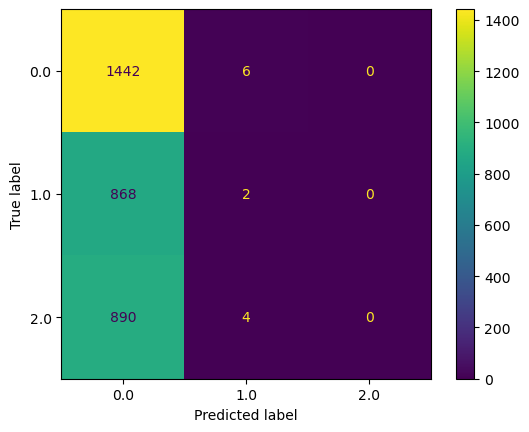

In [25]:
# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(reg, X_test_reduced, y_test)

# Decision Tree Classifier

In [26]:
from sklearn.tree import DecisionTreeClassifier

# Model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_reduced, y_train)

DecisionTreeClassifier(random_state=42)

In [27]:
# Prediction
y_pred_dt = clf.predict(X_test_reduced)
y_pred_dt

array([0., 1., 2., ..., 2., 1., 0.])

In [28]:
y_prob_dt = clf.predict_proba(X_test_reduced)
y_prob_dt

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [29]:
# Evaluation
print("🔹 Decision Tree Report:\n")
print(classification_report(y_test, y_pred_dt))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob_dt, multi_class='ovr'))

🔹 Decision Tree Report:

              precision    recall  f1-score   support

         0.0       0.93      0.92      0.92      1448
         1.0       0.91      0.94      0.93       870
         2.0       0.95      0.94      0.95       894

    accuracy                           0.93      3212
   macro avg       0.93      0.93      0.93      3212
weighted avg       0.93      0.93      0.93      3212

ROC-AUC Score: 0.9482510457410424


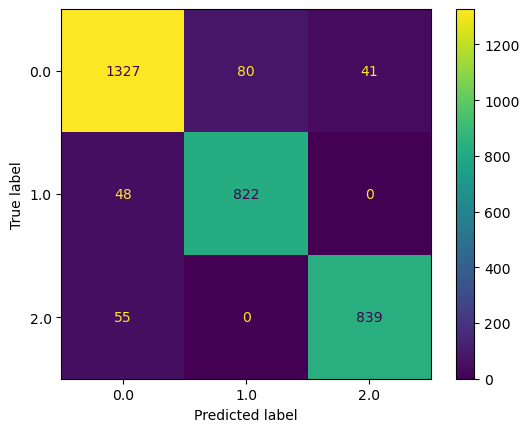

In [30]:
ConfusionMatrixDisplay.from_estimator(clf, X_test_reduced, y_test)

# Random Forest Classifier

In [31]:
from sklearn.ensemble import RandomForestClassifier

# Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_reduced, y_train)

RandomForestClassifier(random_state=42)

In [32]:
# Prediction
y_pred_rf = rf_model.predict(X_test_reduced)
y_pred_rf

array([0., 1., 2., ..., 2., 1., 0.])

In [33]:
y_prob_rf = rf_model.predict_proba(X_test_reduced)
y_prob_rf

array([[0.99, 0.01, 0.  ],
       [0.02, 0.98, 0.  ],
       [0.24, 0.  , 0.76],
       ...,
       [0.06, 0.  , 0.94],
       [0.01, 0.99, 0.  ],
       [0.98, 0.  , 0.02]])

In [34]:
# Evaluation
print("🔹 Random Forest Report:\n")
print(classification_report(y_test, y_pred_dt))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob_rf, multi_class='ovr'))


🔹 Random Forest Report:

              precision    recall  f1-score   support

         0.0       0.93      0.92      0.92      1448
         1.0       0.91      0.94      0.93       870
         2.0       0.95      0.94      0.95       894

    accuracy                           0.93      3212
   macro avg       0.93      0.93      0.93      3212
weighted avg       0.93      0.93      0.93      3212

ROC-AUC Score: 0.9959068613122177


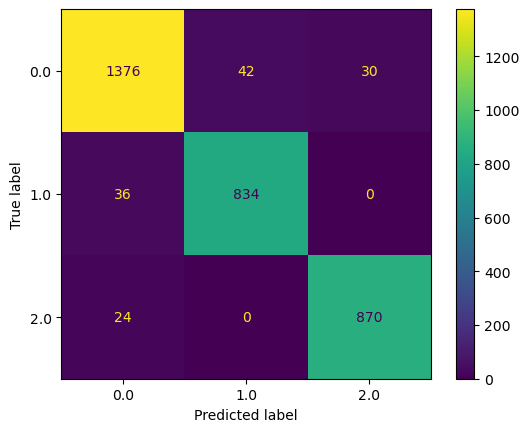

In [41]:
# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(rf_model, X_test_reduced, y_test)

In [35]:
from xgboost import XGBClassifier

# Model
xgb_model = XGBClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric='mlogloss'   # Avoids warning
)


In [36]:
xgb_model.fit(X_train_reduced, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, ...)

In [39]:
# Prediction
y_pred_xgb = xgb_model.predict(X_test_reduced)
y_prob_xgb = xgb_model.predict_proba(X_test_reduced)

In [40]:
# Evaluation
print("🔹 XGBoost Report:\n")
print(classification_report(y_test, y_pred_xgb))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob_xgb, multi_class='ovr'))

🔹 XGBoost Report:

              precision    recall  f1-score   support

         0.0       0.94      0.95      0.95      1448
         1.0       0.94      0.95      0.95       870
         2.0       0.97      0.96      0.97       894

    accuracy                           0.95      3212
   macro avg       0.95      0.95      0.95      3212
weighted avg       0.95      0.95      0.95      3212

ROC-AUC Score: 0.9957496421056627


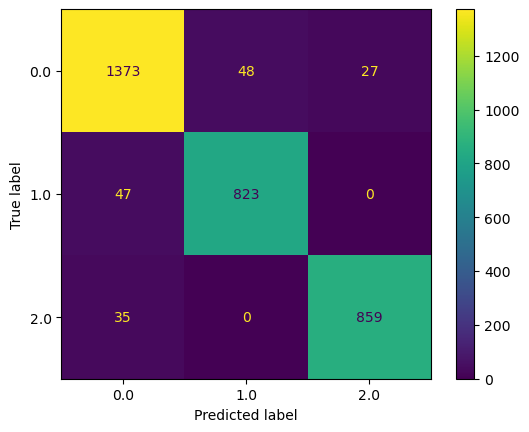

In [42]:
# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(xgb_model, X_test_reduced, y_test)

In [43]:
# 📊 Update Model Comparison Table
# ==============================================
model_results = pd.DataFrame({
    "Model": ["Logistic Regression", "Decision Tree", "Random Forest", "XGBoost"],
    "ROC-AUC": [
        roc_auc_score(y_test, y_prob_lr, multi_class='ovr'),
        roc_auc_score(y_test, y_prob_dt, multi_class='ovr'),
        roc_auc_score(y_test, y_prob_rf, multi_class='ovr'),
        roc_auc_score(y_test, y_prob_xgb, multi_class='ovr')
    ]
})

In [46]:
print("\n Final Model Comparison:")
print(model_results)


 Final Model Comparison:
                 Model   ROC-AUC
0  Logistic Regression  0.606970
1        Decision Tree  0.948251
2        Random Forest  0.995907
3              XGBoost  0.995750


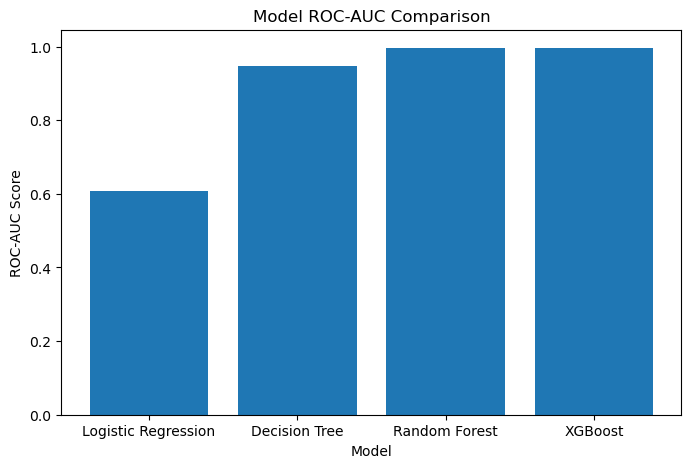

In [47]:
# Optional: Plot ROC-AUC Comparison
plt.figure(figsize=(8,5))
plt.bar(model_results["Model"], model_results["ROC-AUC"])
plt.title("Model ROC-AUC Comparison")
plt.xlabel("Model")
plt.ylabel("ROC-AUC Score")
plt.show()

# Real Test

In [52]:
sample = {
    'Age': 30,
    'Annual_Income': 50000,
    'Num_Bank_Accounts': 5,
    'Num_Credit_Card': 3,
    'Interest_Rate': 10,
    'Num_of_Loan': 2,
    'Delay_from_due_date': 5,
    'Outstanding_Debt': 10000,
    'Credit_Utilization_Ratio': 40,
    'Monthly_Balance': 2000
}

# 1️⃣ Empty frame with same structure as training features
sample_df = pd.DataFrame(columns=X_train_reduced.columns)

# 2️⃣ Fill known features
for key, value in sample.items():
    if key in sample_df.columns:
        sample_df.loc[0, key] = value

# 3️⃣ Fill others with 0
sample_df = sample_df.fillna(0)

# 4️⃣ Predict
pred = xgb_model.predict(sample_df)[0]
label_map = {0: "Standard", 1: "Good", 2: "Bad"}
print("Predicted Credit Mix:", label_map[pred])


Predicted Credit Mix: Good


In [57]:
sample = {
    'Age': 20,
    'Annual_Income': 10000,
    'Num_Bank_Accounts': 1,
    'Num_Credit_Card': 1,
    'Interest_Rate': 25,
    'Num_of_Loan': 6,
    'Delay_from_due_date': 30,
    'Outstanding_Debt': 10000,
    'Credit_Utilization_Ratio': 90,
    'Monthly_Balance': 200
}
# 1️⃣ Empty frame with same structure as training features
sample_df = pd.DataFrame(columns=X_train_reduced.columns)

# 2️⃣ Fill known features
for key, value in sample.items():
    if key in sample_df.columns:
        sample_df.loc[0, key] = value

# 3️⃣ Fill others with 0
sample_df = sample_df.fillna(0)

# 4️⃣ Predict
pred = xgb_model.predict(sample_df)[0]
label_map = {0: "Standard", 1: "Good", 2: "Bad"}
print("Predicted Credit Mix:", label_map[pred])


Predicted Credit Mix: Standard
